In [224]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [225]:
image = cv2.imread('sar_2_color.jpg')

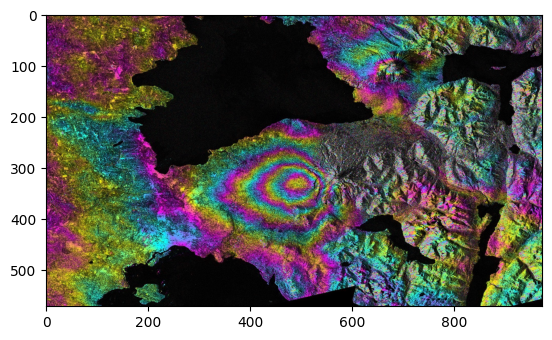

In [226]:
plt.imshow(image)

In [227]:
image.shape # h,w,c

(572, 974, 3)

In [228]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [229]:
# ROI
img_roi = image[100:200, 500:700]

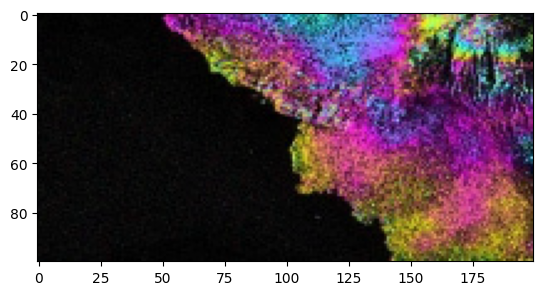

In [230]:
plt.imshow(img_roi)

In [231]:
b,g,r = cv2.split(image)

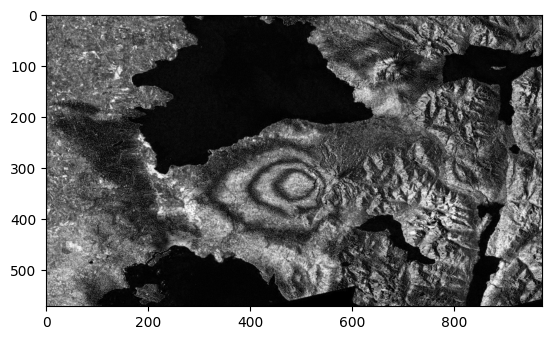

In [232]:
plt.imshow(b, cmap = 'gray')

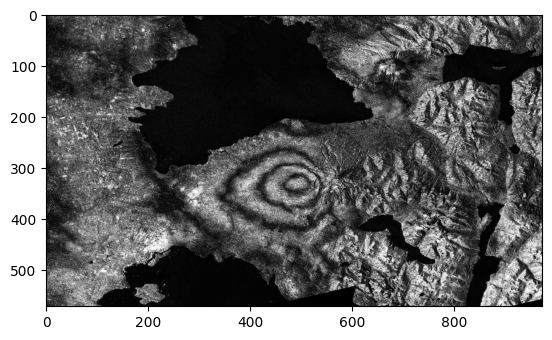

In [233]:
plt.imshow(g, cmap = 'gray')

In [234]:
# alternative approach
b = image[:,:,0]

In [235]:
import copy

image2 = copy.deepcopy(image)

In [236]:
image2[50:100,50:100] = [0,0,0]

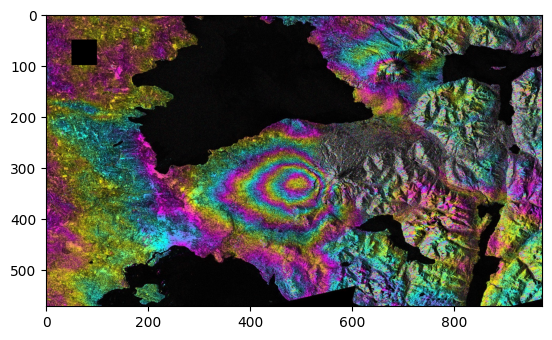

In [237]:
plt.imshow(image2)

In [238]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

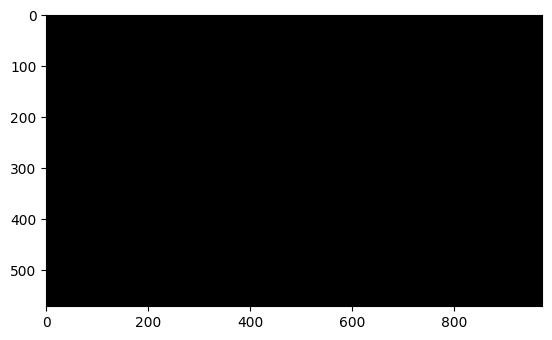

In [239]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [240]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [241]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [242]:
image_gray[0,0]

np.uint8(40)

In [243]:
image_gray.shape

(572, 974)

In [244]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [245]:
image_hsv.shape

(572, 974, 3)

In [246]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [247]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [248]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [249]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [250]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

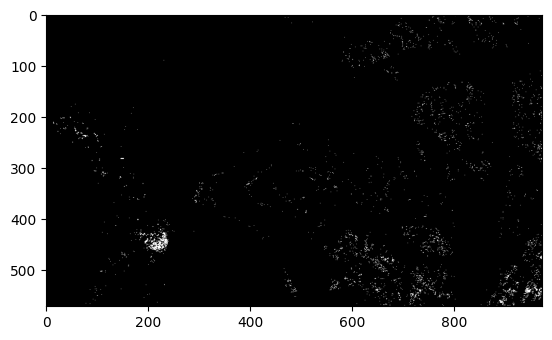

In [251]:
plt.imshow(thresh1, cmap='gray')

In [252]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [253]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

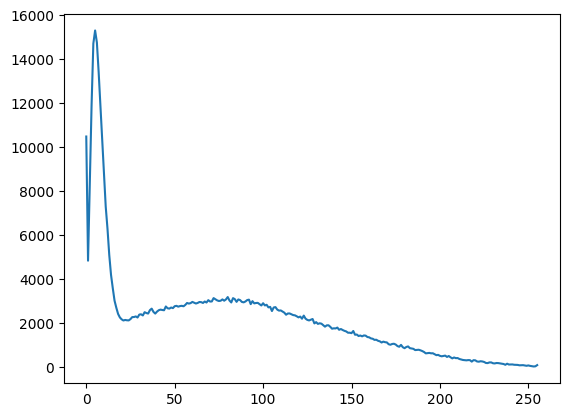

In [254]:
plt.plot(b_hist)

In [255]:
b_hist_cum = b_hist.cumsum()

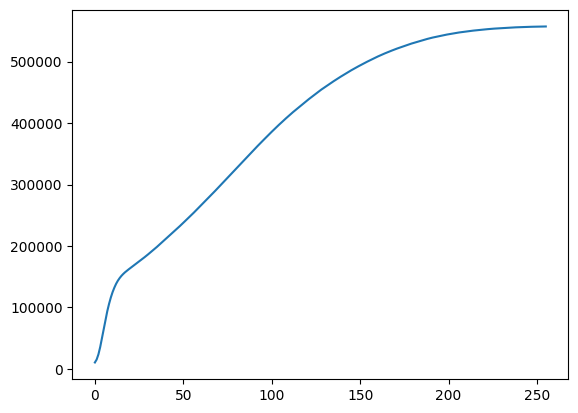

In [256]:
plt.plot(b_hist_cum)

In [257]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

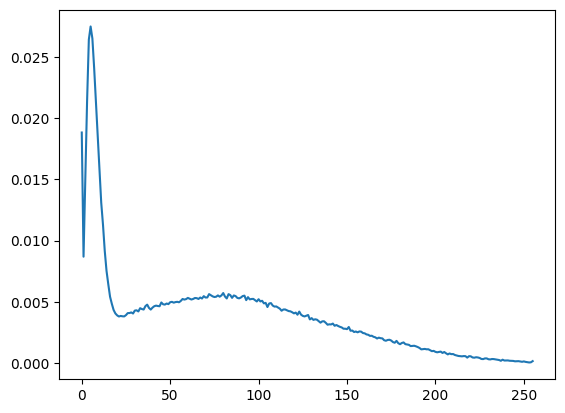

In [258]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [259]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


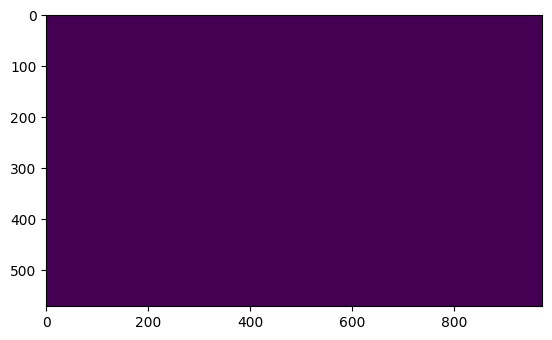

In [260]:
plt.imshow(diff)

In [261]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [262]:
mean = image_gray.mean()

In [263]:
std = image_gray.std()

In [264]:
print(mean,std)

67.41225535245043 52.016191875959635


In [265]:
eq_gray = cv2.equalizeHist(image_gray)

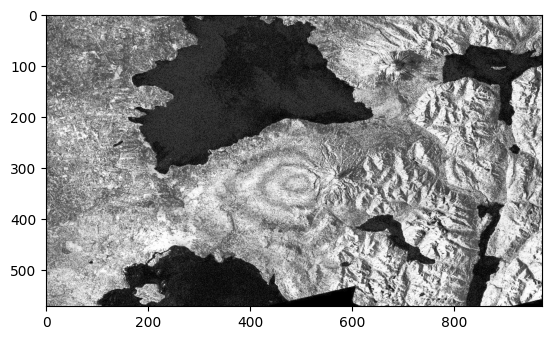

In [266]:
plt.imshow(eq_gray, cmap="gray")


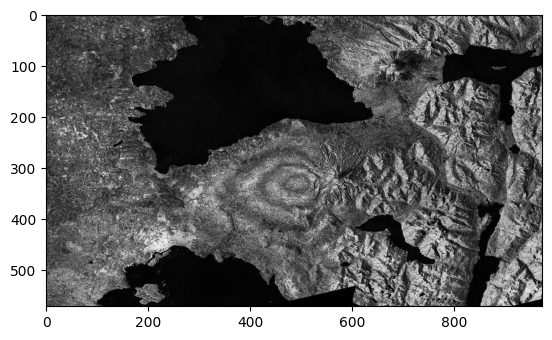

In [267]:
plt.imshow(image_gray, cmap="gray")

In [268]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

## 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

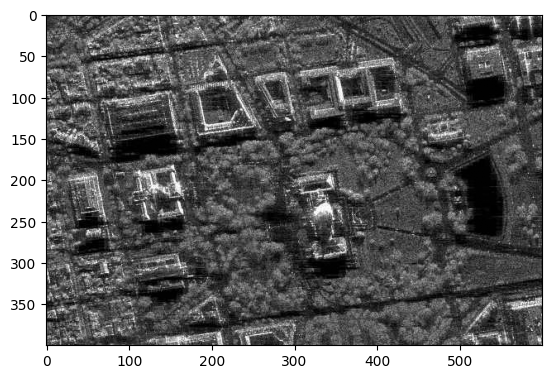

In [269]:
image = cv2.imread('sar_1_gray.jpg', cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

## 2. постройте гистограмму

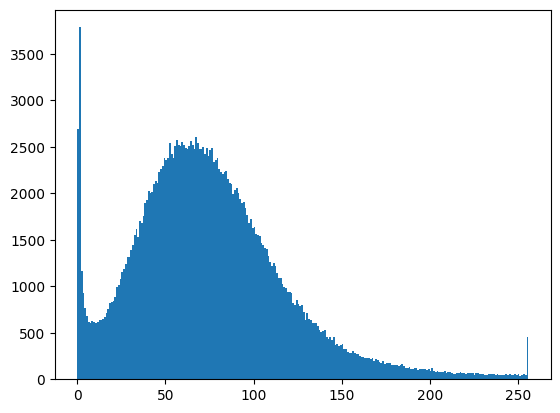

In [270]:
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.show()

## 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

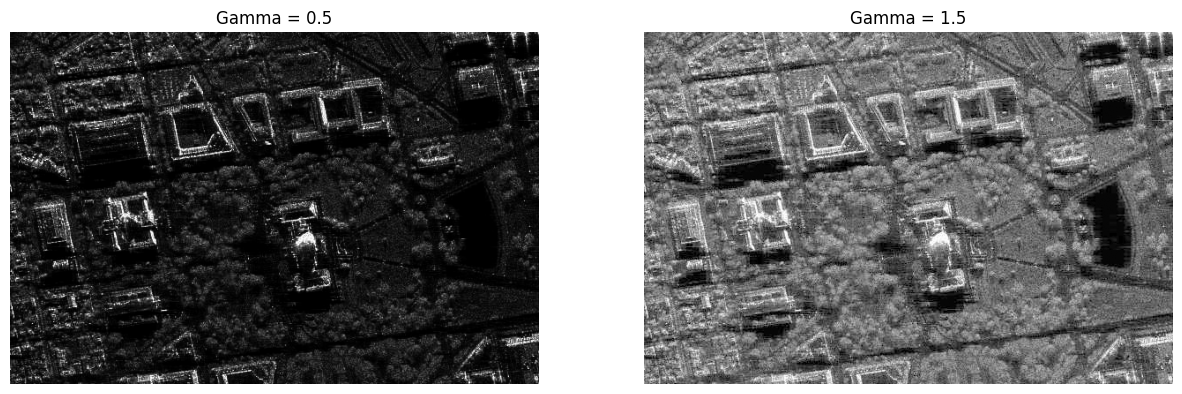

In [271]:
def gamma_correction(image, gamma):
    # 255 x (pixel / 255)^(1/gamma)
    gamma_corrected = 255 * np.power(image / 255.0, 1.0 / gamma)
    return np.uint8(gamma_corrected)

image_gamma_05 = gamma_correction(image, 0.5)
image_gamma_15 = gamma_correction(image, 1.5)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image_gamma_05, cmap='gray')
plt.title('Gamma = 0.5')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gamma_15, cmap='gray')
plt.title('Gamma = 1.5')
plt.axis('off')

plt.show()

## 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [272]:
#def mse(image1, image2):
#    return np.mean((image1 - image2) ** 2)

mse_05 = mean_squared_error(image, image_gamma_05)
mse_15 = mean_squared_error(image, image_gamma_15)
ssim_05 = structural_similarity(image, image_gamma_05)
ssim_15 = structural_similarity(image, image_gamma_15)

print('Gamma = 0.5')
print(f'  MSE: {mse_05}')
print(f'  SSIM: {ssim_05}')
print('Gamma = 1.5')
print(f'  MSE: {mse_15}')
print(f'  SSIM: {ssim_15}')

Gamma = 0.5
  MSE: 2383.7636375
  SSIM: 0.5270459922820344
Gamma = 1.5
  MSE: 1114.4519291666666
  SSIM: 0.8939717313812032


## 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

MSE: 4021.7966791666668
SSIM: 0.6991361032506224


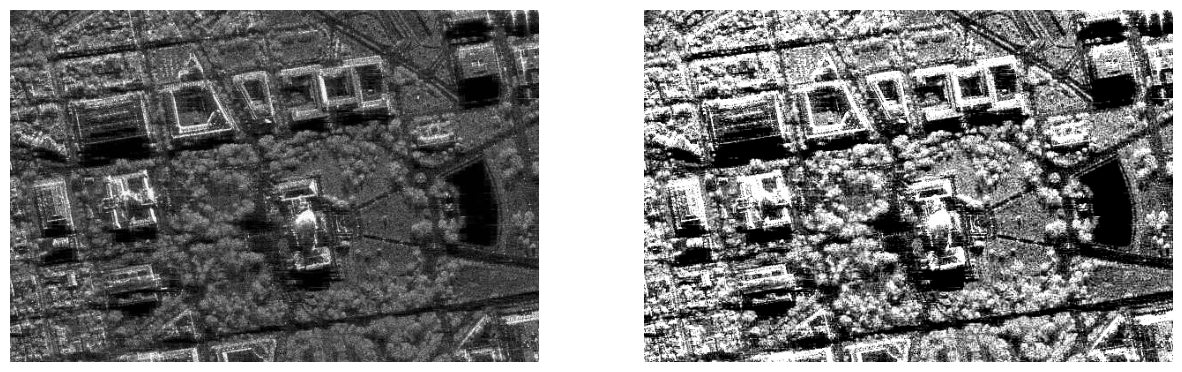

In [273]:
eq_gray = cv2.equalizeHist(image)

def scc(src, eq_gray):
    src_mean, src_std = cv2.meanStdDev(src)
    eq_gray_mean, eq_gray_std = cv2.meanStdDev(eq_gray)

    image_corrected = (src - src_mean) * (eq_gray_mean / src_std) + eq_gray_mean
    image_corrected = np.clip(image_corrected, 0, 255).astype(np.uint8)

    return image_corrected

image_corrected = scc(image, eq_gray)

print(f'MSE: {mean_squared_error(image, eq_gray)}')
print(f'SSIM: {structural_similarity(image, eq_gray)}')

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_corrected, cmap='gray')
plt.axis('off')

plt.show()

## 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

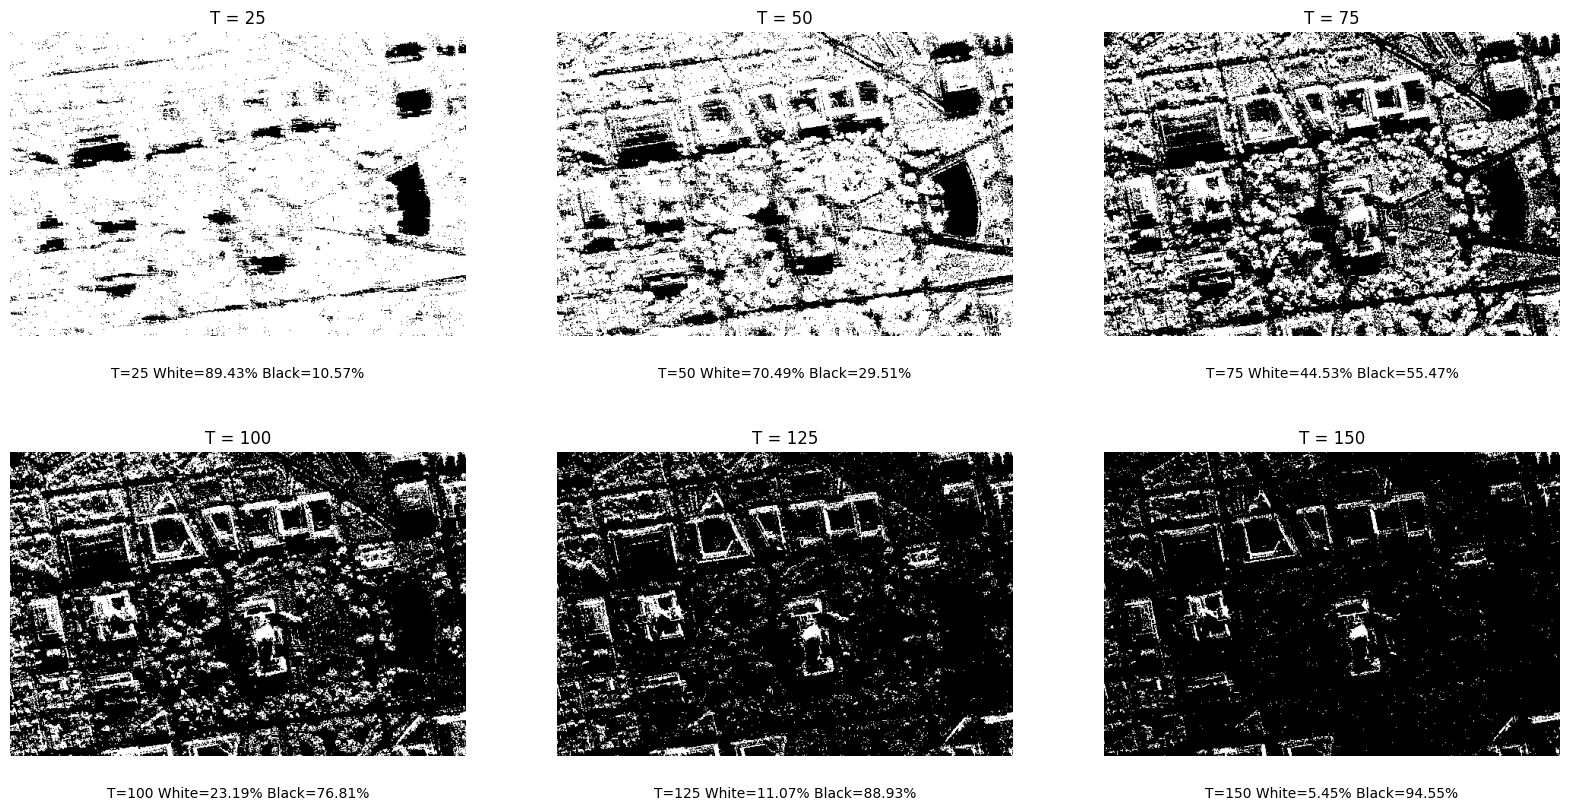

In [274]:
thresh_vals = [25, 50, 75, 100, 125, 150]

plt.figure(figsize=(20, 10))

for i in range(len(thresh_vals)):
    _, th = cv2.threshold(image, thresh_vals[i], 255, cv2.THRESH_BINARY)

    whites = (th == 255).sum()
    blacks = (th == 0).sum()
    all = th.size
    white_percent = whites / all * 100
    black_percent = blacks / all * 100

    plt.subplot(2, 3, i + 1)
    plt.imshow(th, cmap='gray')
    plt.title(f'T = {thresh_vals[i]}')
    plt.axis('off')
    plt.gca().text(0.5, -0.1, f'T={thresh_vals[i]} White={white_percent:.2f}% Black={black_percent:.2f}%', ha='center', va='top', transform=plt.gca().transAxes)

plt.show()